# **Tarefa 3 - Modelagem de um Sistema de Resfriamento de Chips - MAP3121**

#### Data de entrega: 10/07/2022

*   Rodrigo Gebara Reis - NUSP: 11819880
*   Victor Rocha da Silva - NUSP: 11223782


## **1. Equação do Calor**

Nesta tarefa, buscamos modelar o comportamento de difusão térmica que ocorre em um processador de computador, ao ser resfriado por uma placa colada na parte superior do bloco do chip. 

Como hipótese de simplificação, o processador, que usualmente tem tamanho $L\times L$ e altura $h$, será considerado unidimensional: largura $L$ e altura $h$ suficientemente fina para que a variação de temperatura na vertical seja desprezível.

Além disso, será assumido que a base do chip é termicamente isolada, e que a troca de calor com o resfriador é perfeita. Com isso, a análise deve levar em conta somente as variações de temperatura na direção $x$, como mostra a figura abaixo (retirada do enunciado da tarefa 3).

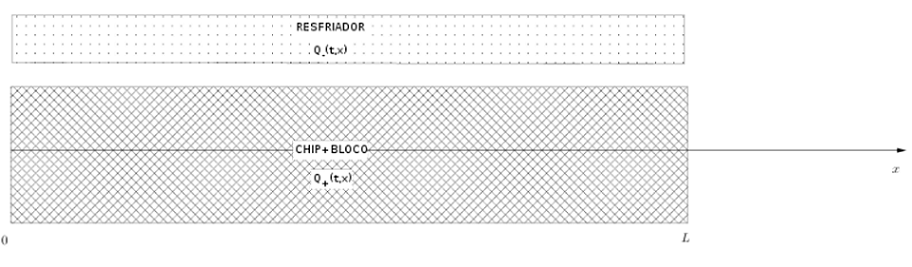

A distribuição de calor do chip pode ser modelada pela equação do calor de Fourier e da conservação de energia. Para o caso unidimensional considerado:

$$\rho C\frac{\partial T(t,x)}{\partial t} = \frac{\partial}{\partial x}\left(k(x)\frac{\partial T(t,x)}{\partial x}\right) + Q(t,x)$$

com
- $T(t,x)$ é a temperatura do chip na posição $x$ no tempo $t$
- $\rho$ é a densidade do material do chip
- $C$ é o calor específico do material
- $k$ é o parâmetro de condutividade térmica do material
- $Q$ é a soma do calor gerado pelo chip ($Q_+$, positivo) com o calor retirado do sistema pelo resfriador ($Q_-$, negativo), de forma que $Q = Q_+ - Q_-$.

Para o silício, material comum em chips de processadores, temos:
- $\rho = 2300\textrm{ kg/m}^3$
- $C = 750\textrm{ J/kgK}$
- $k = 3.6\textrm{ W/mK}$

O calor gerado pelo chip pode ser obtido a partir de sua potência e volume, seguindo, para a simplificação adotada,

$$Q_+ = \frac{P}{L}$$

Além disso, para resolver a equação, é necessário conhecer a distribuição de temperatura inicial $T(0,x)$ e o que ocorre nas fronteiras do chip. Como mais uma hipótese de simplificação, vamos considerar que a temperatura nos extremos é igual à temperatura no ambiente externo, ou seja:

$$T(t, 0) = T(t, L) = T_{amb}$$

Podemos, eventualmente, supor que $T_{amb} = 20^{\circ}\textrm{C}$.


------------------------------------------------------------------------

## **2. Estado Estacionário**

Se considerarmos que o processador trabalha em regime permanente, ou seja, que diversas propriedades são inalteráveis no tempo, teremos que derivadas parciais em relação ao tempo serão nulas. No caso do problema, 

$$\frac{\partial T(t,x)}{\partial t} = 0$$

Para o chip, as propriedades que podem permanecer constantes no tempo são a temperatura, e o calor trocado. Para que este último seja realmente constante, devemos considerar que o processador gera sempre a mesma quantidade de calor e perde calor para o resfriador a taxa constante. Com isso, temos:

$$\frac{\partial}{\partial x}\left(k(x)\frac{\partial T(x)}{\partial x}\right) +Q(x) = 0 \Leftrightarrow \frac{\partial}{\partial x}\left(-k(x)\frac{\partial T(x)}{\partial x}\right) =Q(x)$$

------------------------------------------------------------------------

## **3. Método de Elementos Finitos**

Nesta seção, vamos nos preocupar com uma particularização do **Problema de Sturm-Liouville**, a equação diferencial auto-adjunta de segunda ordem

$$L(u(x)) := (-k(x)u'(x))'+q(x)u(x)=f(x)$$

Para o problema estudado, podemos supor que $x\in [0,1]$ e que conhecemos duas condições de contorno: $u(0) = u(1) = 0$. Além disso, consideramos o caso em que $k(x) > 0$ e ao menos uma vez diferenciável em $(0,1)$, $q(x)\geq 0$, e $q(x)$ e $f(x)$ contínuas em $[0,1]$.

Por inspeção, percebe-se que $u(x)$ parece pertencer a um conjunto de funções, tal que

$$u(x)\in V_0 = \{v\in C^2[0,1]:v(0)=v(1)=0\}$$

Se $u$ é solução da equação, então $L(u(x)) = f(x)$. Logo:

$$\int_0^1 L(u(x))v(x)dx = \int_0^1 f(x)v(x)dx$$

$$\int_0^1(-k(x)u'(x))'v(x)dx+\int_0^1q(x)u(x)v(x)dx = \int_0^1 f(x)v(x)dx$$

Resolvendo a primeira integral por partes:

$$\begin{cases}
dt = (-k(x)u'(x))'dx\Rightarrow t = -k(x)u'(x)\\
y = v(x)\Rightarrow dy = dv =v'(x)dx\\
\end{cases}$$

$$\int_0^1(-k(x)u'(x))'v(x)dx = ty\Bigr|\substack{x=1\\\\\\\\\\\\x=0}-\int_{x=0}^{x=1} tdy$$

$$= (-k(x)u'(x))'v(x)\Bigr|\substack{x=1\\\\\\\\\\\\x=0}-\int_0^1 -k(x)u'(x)v'(x)dx = \int_0^1 k(x)u'(x)v'(x)dx$$

Substituindo na integral inicial:

$$\int_0^1 k(x)u'(x)v'(x) + q(x)u(x)v(x)dx = \int_0^1 f(x)v(x)dx,\,\forall v\in V_0$$







Um fato interessante é que esta formulação implica que toda função $u(x)\in V_0$ que satisfaz essa igualdade de integrais também deve satisfazer a equação diferencial. 

Entretanto, onde antes era necessário ter uma função de classe $C^2[0,1]$, agora basta que ela seja de classe $C^1[0,1]$. Assim, o espaço $V_0$ se reduz a $U_0 = \{u\in C^1[0,1]:u(0)=u(1)=0\}$

Vamos agora analisar a expressão

$$T(u,v) = \int_0^1 k(x)u'(x)v'(x) + q(x)u(x)v(x)dx$$

É imediato que 
- $T(u,v) = T(v,u)$
- $T(\alpha u, v) = \alpha T(u,v)$
- $T(u_1+u_2,v)=T(u_1,v)+T(u_2,v)$ devido à linearidade de derivadas e integrais.

Também pode-se concluir que $T(u,u) \geq 0$, devido às restrições impostas em $k(x)$ e $q(x)$: $k(x) > 0 $ e $q(x) \geq 0$. Com isso, para $q(x) > 0$, temos:

$$T(u,u) = \int_0^1 k(x)(u'(x))^2+q(x)(u(x))^2dx$$

Como todos os termos são não negativos, a integral só pode ser zero se $u(x) = u'(x) = 0$.

Para o caso em que $q(x) = 0$, resta apenas um termo:

$$T(u,u) = \int_0^1 k(x)(u'(x))^2dx$$

que é zero se $u'(x) = 0 \Rightarrow u(x) = c\in\mathbb{R}$. No entanto, pelas condições de contorno $u(0) = u(1) = 0$, então $c$ deve obrigatoriamente ser igual a zero. Desse modo, conclui-se que $T(u,u) \geq 0,\,\forall u\in U_0$.


Sendo assim, dadas essas quatro propriedades, prova-se que $T(u,v)$ define um produto interno do espaço $U_0$, ou seja:

$$\langle u,v\rangle_L = \int_0^1 k(x)u'(x)v'(x) + q(x)u(x)v(x)dx$$

### **3.1. Método de Ritz-Raleigh**

O método de Ritz-Raleigh é uma aproximação de mínimos quadrados para

$$\int_0^1 k(x)u'(x)v'(x) + q(x)u(x)v(x)dx = \int_0^1 f(x)v(x)dx\,\,\,\,\,\,(1)$$

A aproximação deve ser determinada pela projeção ortogonal da solução $u(x)$ em um subespaço de dimensão finita, $U_n$. Entretanto, como desconhecemos $u(x)$, é problemático utilizar o produto interno usual para calcular os coeficientes buscados.

Com isso, podemos substituir o produto interno usual $\langle u, v\rangle=\int_0^1u(x)v(x)dx$ pelo produto deduzido $\langle u, v\rangle_L$. Neste caso, a solução aproximada $\overline{u}_n(x)$ é tal que $\langle u-\overline{u}_n, v\rangle_L = 0$, qualquer que seja $v_n\in U_n$, ou seja:

$$\langle\overline{u}_n, v\rangle_L=\langle u, v\rangle_L$$

Abaixo encontra-se uma representação gráfica para simples interpretação do problema.




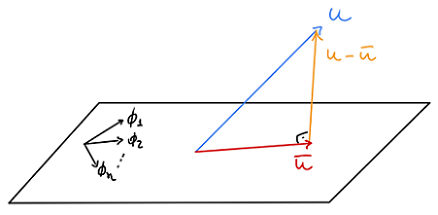

Entretanto, analisando a expressão (1), podemos escrever:

$$\langle u, v\rangle_L = \langle f, v\rangle$$

ou seja:

$$\langle\overline{u}_n, v\rangle_L=\langle f, v\rangle$$

Note que, afinal, a expressão de minimização realmente não depende de $u$, isto é, conseguimos encontrar a melhor aproximação para $u(x)$ no espaço $U_n$, mesmo desconhecendo essa função.

Com isso, basta determinar uma base $\{\phi_i\},\,i=1\dots n$, para o subespaço $U_n$, e resolver o sistema característico do método dos mínimos quadrados. Escrevendo $\overline{u}_n = \sum_{i=1}^n \alpha_i\phi_i$ e $v_n = \sum_{i=1}^n\beta_i\phi_i$, temos $n$ equações do tipo:

$$\sum_{i=1}^n\langle\phi_i,\phi_j\rangle_L\alpha_i\beta_j=\sum_{i=1}^n\langle f, \phi_j\rangle\beta_j$$

$$\Rightarrow \sum_{i=1}^n\langle\phi_i,\phi_j\rangle_L\alpha_i=\sum_{i=1}^n\langle f, \phi_j\rangle$$

ou ainda:

$$ \begin{bmatrix}
\langle\phi_1,\phi_1\rangle_L & \langle\phi_2,\phi_1\rangle_L & \dots & \langle\phi_n,\phi_1\rangle_L \\
\vdots & \vdots & \ddots & \vdots \\
\langle\phi_1,\phi_n\rangle_L & \langle\phi_2,\phi_n\rangle_L & \dots & \langle\phi_n,\phi_n\rangle_L 
\end{bmatrix}  \cdot\begin{bmatrix}
\alpha_1 \\
\vdots \\
\alpha_n 
\end{bmatrix} = \begin{bmatrix}
\langle f,\phi_1\rangle \\
\vdots \\
\langle f,\phi_n\rangle 
\end{bmatrix}\,\,\,\,\,(2)$$

### **3.2. Escolha do espaço $U_n$**

Vamos escolher $U_n$ como $S^0_{2,n}[0,1]$, o espaço de Splines lineares com nós uniformemente espaçados em $[0,1]$. Para $n+1$ nós, temos:

$$x_i = ih,\, i = 0,1,\dots, n+1$$

onde $h = \dfrac{1}{n+1}$ é o espaçamento constante entre os nós.

Vamos agora analisar o conjunto de funções "chapéu" $\phi_i(x)$, definidas, no caso de nós uniformemente espaçados, por:
$$\phi_i(x) = \begin{cases}
\dfrac{x-x_{i-1}}{h},\textrm{ se }x\in[x_{i-1},x_i)\\
\dfrac{x_{i+1}-x}{h},\textrm{ se }x\in[x_i,x_{i+1}]\\
0,\textrm{ caso contrário}
\end{cases}$$



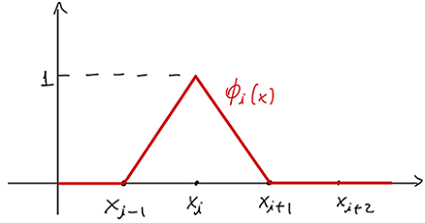

Podemos descrever os splines lineares como combinações lineares das funções "chapéu", uma vez que, dados dois pontos $x_i$ e $x_{i+1}$, apenas uma reta passa entre eles. Esta reta, por sua vez, pode ser determinada pela soma:

$$S_1(x) = \phi_i\cdot f(x_i)+\phi_{i+1}\cdot f(x_{i+1})$$



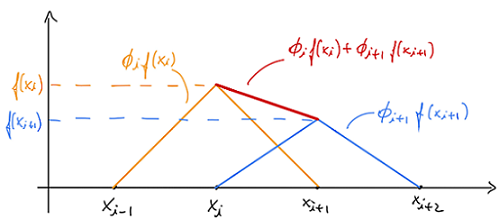

Para aproximar uma função no intervalo $[0,1]$, basta realizar a mesma operação para todos os intervalos $[x_i,x_{i+1}]$.

### **3.2.1. Características do espaço $U_n$**

Além disso, podemos provar que o espaço $S^0_{2,n}[0,1]$ é um espaço vetorial. 

É imediato que $U_n = S^0_{2,n}[0,1]$ obedece às três propriedades básicas de um espaço vetorial:
- $0\in U_n$
- $u + v \in U_n,\,\forall\,u, v\in U_n$
- $m\cdot u \in U_n,\,\forall\,u\in U_n$ e $m\in\mathbb{R}$

Note que o conjunto de funções $\{\phi_i\}$ é linearmente independente:

Suponha uma combinação linear $k_i \phi_i+k_{i+1} \phi_{i+1}+\cdots+k_n \phi_n =0$.

Para $x=x_i$, temos $\phi_i=1$ e $\phi_j=0$ se $j \ne i$. Avaliando a equação em $x=x_i$, chegamos em $k_i \cdot 1+0+\cdots+0 = 0 \Rightarrow k_i = 0$. 

Da mesma forma, ao avaliar em $x=x_{i+1},\cdots,x_n$, chegamos em $k_{i+1}=0, \cdots, k_n=0$. Portanto, $\{\phi_i, \phi_{i+1}, \cdots, \phi_n\}$ é linearmente independente.

Dados $x_0$ e $x_{n+1}$ fixos, que são justamente os extremos $[0,1]$, ainda restam $n$ pontos. Isso implica que $\textrm{dim }S^0_{2,n}[0,1] = n$, e que precisamos de uma $\phi_i$ para cada ponto. Assim, dadas $n$ funções $\phi_i$:

$$S^0_{2,n}[0,1] = \sum_{i=1}^n f(x_i)\cdot\phi_i$$

temos que $\{\phi_i\}$ é um conjunto linearmente independente que descreve todo o espaço em questão. Logo, $\{\phi_i\}$ é uma base do espaço $S^0_{2,n}[0,1]$. 

Assim, temos que o espaço $U_n = S^0_{2,n}[0,1]$ é, de fato, um espaço vetorial $n$-dimensional.

O intervalo $[x_{i-1},x_{i+1}]$ é chamado suporte de $\phi_i$. Para utilizar o método de elementos finitos, buscamos funções com suportes pequenos, tais que $h\rightarrow 0$.

É interessante perceber que os suportes de duas funções $\phi_i$ e $\phi_j$ só não se intersectam se $|i-j| > 1$. Nesse caso, decorre que $\langle\phi_i, \phi_j\rangle_L = 0$, e o sistema linear de (2) será **tridiagonal**.

Para o caso em que $|i-j| \leq 1$, a intersecção é não vazia, e podemos calcular os produtos internos a partir da definição por integral:

$$\langle \phi_i,\phi_j\rangle_L = \int_0^1 k(x)\phi_i'(x)\phi_j'(x) + q(x)\phi_i(x)\phi_j(x)dx$$

Além disso, podemos analisar os produtos internos $\langle f, \phi_i\rangle$:

$$\langle f, \phi_i\rangle = \int_0^1f(x)\phi_i(x)dx = \int_{x_{i-1}}^{x_{i+1}}f(x)\phi_i(x)dx = \int_{x_{i-1}}^{x_{i}}f(x)\cdot\frac{x-x_{i-1}}{h}dx + \int_{x_{i}}^{x_{i+1}}f(x)\cdot\frac{x_{i+1}-x}{h}dx$$

já que $\phi_i(x) = 0,\, \forall x\notin [x_{i-1},x_{i+1}]$.

Podemos criar um algoritmo para determinar o valor numérico desses produtos. Para isso, vamos declarar rotinas desenvolvidas na **Tarefa 2** do curso de Métodos Numéricos:

In [1]:
def nos_pesos(n): # recupera nós e pesos a partir do arquivo .txt fornecido

  assert (n == 6 or n == 8 or n == 10), "O valor utilizado para os nós e pesos não é válido. Tente usar 6, 8 ou 10."

  if n == 6:
    x = np.array([-0.2386191860831969086305017, -0.6612093864662645136613996, -0.9324695142031520278123016, 0.2386191860831969086305017, 0.6612093864662645136613996, 0.9324695142031520278123016])
    w = np.array([0.4679139345726910473898703, 0.3607615730481386075698335, 0.1713244923791703450402961, 0.4679139345726910473898703, 0.3607615730481386075698335, 0.1713244923791703450402961])

  elif n == 8:
    x = np.array([-0.1834346424956498049394761, -0.5255324099163289858177390, -0.7966664774136267395915539, -0.9602898564975362316835609,
                  0.1834346424956498049394761, 0.5255324099163289858177390, 0.7966664774136267395915539, 0.9602898564975362316835609])
    w = np.array([0.3626837833783619829651504, 0.3137066458778872873379622, 0.2223810344533744705443560, 0.1012285362903762591525314,
                  0.3626837833783619829651504, 0.3137066458778872873379622, 0.2223810344533744705443560, 0.1012285362903762591525314])

  elif n == 10:
    x = np.array([-0.1488743389816312108848260, -0.4333953941292471907992659, -0.6794095682990244062343274, -0.8650633666889845107320967, -0.9739065285171717200779640,
                  0.1488743389816312108848260, 0.4333953941292471907992659, 0.6794095682990244062343274, 0.8650633666889845107320967, 0.9739065285171717200779640])
    w = np.array([0.2955242247147528701738930, 0.2692667193099963550912269, 0.2190863625159820439955349, 0.1494513491505805931457763, 0.0666713443086881375935688,
                  0.2955242247147528701738930, 0.2692667193099963550912269, 0.2190863625159820439955349, 0.1494513491505805931457763, 0.0666713443086881375935688])

  return x, w

def integral_a_to_b(f, a, b, n):
# Entradas: função f(x), extremos a, b do intervalo de integração, número de nós n
# Saída: resultado da integral de a até b de f(x)
# Caso mais geral da função integral(f, n), aplica a fórmula de mudança de variável deduzida acima

  l = (b-a)/2 # Define-se dois parâmetros para a transformação linear: metade do tamanho do intervalo
  m = (a+b)/2 # e o ponto médio, segundo as fórmulas deduzidas

  y, w = nos_pesos(n) # Recupera os valores fornecidos no arquivo .txt

  x = l*y + m # Aplica a transformação linear do intervalo [-1,1] para [a,b]
  sum = 0
   
  for i in range(n): # Realiza a soma descrita no algoritmo deduzido (soma de w_j*f(x_j))
    sum += w[i]*f(x[i])

  sum = sum*l # Finaliza a aplicação da fórmula geral para [a,b] multiplicando por (b-a)/2

  return sum # Retorna o valor final da soma, aproximadamente a integral definida

In [2]:
import numpy as np

# Primeiramente, cria-se uma rotina para determinar todos os pontos igualmente espaçados dentro do intervalo [0,1],
# de acordo com o apresentado anteriormente: x_i = ih, h = 1/(n+1):

def pontos(n): # Recebe apenas o número n de pontos desejados, sem contar os extremos
  return [i/(n+1) for i in range(0, n+2)] # Retorna o conjunto de pontos x_i no intervalo [0,1]

# Função para calcular o vetor de produtos internos <f, phi> no intervalo [0,1]
def fxphi(f, n): # Recebe a função f e o número de pontos n
  x = pontos(n) # x_i dentro de [0,1] para as funções chapéu e integrais
  h = 1/(n+1)

  prod = []

  for i in range(1,len(x)-1): # Calcula-se cada linha (<f, phi_i>) do vetor de produtos internos
    g1 = lambda y : (y-x[i-1])/h*f(y)
    g2 = lambda y : (x[i+1]-y)/h*f(y)

    first = integral_a_to_b(g1, x[i-1], x[i], 10) # Calcula a primeira integral, referente ao intervalo [x[i-1],x[i]] 
    second = integral_a_to_b(g2, x[i], x[i+1], 10) # Calcula a segunda integral, referente ao intervalo [x[i],x[i+1]]

    prod.append(first + second)
    
  return np.array(prod)

Por enquanto, portanto, temos que o sistema (2) torna-se:

$$ 
\begin{bmatrix}
\langle\phi_1,\phi_1\rangle_L & \langle\phi_2,\phi_1\rangle_L &  &  &  \\
\langle\phi_1,\phi_2\rangle_L & \langle\phi_2,\phi_2\rangle_L & \langle\phi_3,\phi_2\rangle_L &  &  \\
 & \ddots & \ddots & \ddots &  \\
 &  & \langle\phi_{n-2},\phi_{n-1}\rangle_L & \langle\phi_{n-1},\phi_{n-1}\rangle_L & \langle\phi_n,\phi_{n-1}\rangle_L \\
 &  &  & \langle\phi_{n-1},\phi_n\rangle_L & \langle\phi_n,\phi_n\rangle_L 
\end{bmatrix}\cdot\begin{bmatrix}
\alpha_1 \\
\vdots \\
\alpha_n 
\end{bmatrix} = \begin{bmatrix}
\langle f,\phi_1\rangle \\
\vdots \\
\langle f,\phi_n\rangle 
\end{bmatrix}\,\,\,\,\,(2)$$

Outra simplificação adicional refere-se aos produtos internos $\langle\phi_i, \phi_j\rangle_L$ restantes, considerando o caso em que $k(x)=1$ e $q(x)=0$. Da definição, temos:

$$\langle \phi_i,\phi_j\rangle_L = \int_0^1 k(x)\phi_i'(x)\phi_j'(x) + q(x)\phi_i(x)\phi_j(x)dx$$

$$\Rightarrow \langle \phi_i,\phi_j\rangle_L = \int_0^1 \phi_i'(x)\phi_j'(x)dx$$
Analisando o formato de $\phi_i$, observamos que:

$$\phi_i'(x) = \begin{cases}
1/h,\textrm{ se }x\in(x_{i-1},x_{i})\\
-1/h,\textrm{ se }x\in(x_{i},x_{i+1})\\
0,\textrm{ caso contrário}\end{cases}$$

Note que o caso $|i-j|\leq 1$ pode ser quebrado em apenas dois de interesse:$|i-j| = 1$ e $|i-j| = 0$. Vamos analisar cada um deles:

- Para $|i-j|=1$:

$$\int_0^1 \phi_i'(x)\phi_j'(x)dx = \int_0^{x_{i-1}}\phi_i'\phi_j'dx+\int_{x_{i-1}}^{x_{i}}\phi_i'\phi_j'dx+\int_{x_{i}}^{x_{i+1}}\phi_i'\phi_j'dx+\int_{x_{i+1}}^{x_{i+2}}\phi_i'\phi_j'dx+\int_{x_{i+2}}^1\phi_i'\phi_j'dx$$

$\,\,\,\,\,\,\,\,\,\,\,\,\,$mas $\phi_i' = \phi_j'= 0$ para $x\in[0,x_{i-1})\cup[x_{i+2},1]$, $\phi_j' = 0$ para $x\in[x_{i-1},x_i)$, e $\phi_i' = 0$ para $x\in[x_{i+1},x_{i+2})$. 

$\,\,\,\,\,\,\,\,\,\,\,\,\,$Logo, a expressão se resume a:

$$\int_0^1 \phi_i'(x)\phi_j'(x)dx = \int_{x_{i}}^{x_{i+1}}\phi_i'\phi_j'dx = \int_{x_{i}}^{x_{i+1}}-\frac{1}{h}\cdot \frac{1}{h}dx = -\frac{1}{h^2}\cdot h = -\frac{1}{h}$$

- Para $|i-j|=0\Leftrightarrow i=j$:

$$\int_0^1 \phi_i'(x)\phi_j'(x)dx = \int_{x_{i-1}}^{x_{i}}\phi_i'\phi_j'dx+\int_{x_{i}}^{x_{i+1}}\phi_i'\phi_j'dx = \int_{x_{i-1}}^{x_{i}}\left(\frac{1}{h}\right)^2dx+\int_{x_{i}}^{x_{i+1}}\left(-\frac{1}{h}\right)^2dx= 2\cdot\frac{1}{h^2}\cdot h = \frac{2}{h}$$

Resumindo, então, temos:

$$\langle\phi_i, \phi_j\rangle_L = 
\begin{cases} -1/h, \textrm{ se } |i-j| = 1\\
2/h, \textrm{ se } i=j
\end{cases}$$

e a matriz fica:

$$ 
\begin{bmatrix}
\frac{2}{h} & -\frac{1}{h} &  &  &  \\
-\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} &  &  \\
 & \ddots & \ddots & \ddots &  \\
 &  & -\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} \\
 &  &  & -\frac{1}{h} & \frac{2}{h}
\end{bmatrix}\cdot\begin{bmatrix}
\alpha_1 \\
\vdots \\
\alpha_n 
\end{bmatrix} = \begin{bmatrix}
\langle f,\phi_1\rangle \\
\vdots \\
\langle f,\phi_n\rangle 
\end{bmatrix}\,\,\,\,\,(2)$$





### **3.3. Solução do Sistema Tridiagonal**

Dados os desenvolvimentos para cálculo dos produtos internos $\langle\phi_i, \phi_j\rangle_L$, tais que $|i-j|\leq 1$, e $\langle f, \phi_i\rangle$, agora precisamos resolver o sistema tridiagonal.

Na **tarefa 1** do curso de Métodos Numéricos, foi desenvolvido um algoritmo de solução de sistemas tridiagonais $Ax = b$, que armazena toda a informação das matrizes em quatro vetores: as três diagonais não nulas da matriz $A$, e mais um do vetor $b$. Esta rotina está declarada abaixo.

In [3]:
def decompLU(a, b, c):
  n = a.shape[0]
  l, u = np.zeros(n), np.zeros(n) # Inicia os vetores l e u

  l[0] = 0 # Assim como a[0] = 0, definimos l[0] = 0
  u[0] = b[0]
  
  # Segue as formulações definidas no texto acima
  for i in range(1, n):
    l[i] = a[i]/u[i-1]
    u[i] = b[i] - l[i]*c[i-1]
    
  return(l, u)

def resolveSistemaTridiagonal(a, b, c, d):
  n = a.shape[0]
  # Decompõe a matriz tridiagonal em uma triangular inferior, caracterizada pelo vetor l,
  # e uma triangular superior, caracterizada pelos vetores u e c
  l, u = decompLU(a, b, c)

  #Ly = d
  y = np.zeros(n)

  y[0] = d[0]
  for i in range(1, n):
    y[i] = d[i] - l[i]*y[i-1]

  #Ux = y
  x = np.zeros(n)

  x[n-1] = y[n-1]/u[n-1]
  for i in range(n-2, -1, -1):
    x[i] = (y[i]-c[i]*x[i+1])/u[i]

  return x

Para utilizá-la, vamos definir os vetores da matriz $A$ no formato necessário:

In [4]:
def vector_a(n): # Define o vetor da diagonal abaixo da principal, completo com -1/h, recebe a ordem n da matriz tridiagonal
  a = [0]
  h = 1/(n+1)
  for i in range(n-1):
    a.append(-1/h)

  return np.array(a)

def vector_b(n): # Define o vetor da diagonal principal, completo com 2/h, recebe a ordem n da matriz tridiagonal
  b = []
  h = 1/(n+1)
  for i in range(n):
    b.append(2/h)

  return np.array(b)

def vector_c(n): # Define o vetor da diagonal acima da principal, completo com -1/h, recebe a ordem n da matriz tridiagonal
  c = []
  h = 1/(n+1)
  for i in range(n-1):
    c.append(-1/h)
  c.append(0)

  return np.array(c)


### **3.4. Solução do método de elementos finitos**

Uma vez resolvido o sistema, teremos obtido a função $\overline{u}_n(x)=\sum_{i=1}^n\alpha_i\phi_i(x)$ que melhor aproxima $u(x)$, que é solução das equações apresentadas.

Em código, definimos as funções $\phi_i$ para serem calculadas em um ponto arbitrário $\overline{x}$. Assim, junto ao vetor de coeficientes advindo da resolução do sistema, temos:

$$\overline{u}_n(\overline{x}) = \alpha^t \cdot \phi(\overline{x})$$

com $\alpha = [\alpha_1\,\,\alpha_2\,\dots\,\alpha_n]^t$ e $\phi(\overline{x}) = [\phi_1(\overline{x})\,\,\phi_2(\overline{x})\,\dots\,\phi_n(\overline{x})]^t$. Em código:  

In [5]:
def phi_i(point, x, i): # Definição das funções phi_i, de acordo com a definição apresentada na seção 3.2
# Recebe o ponto 'point', o conjunto de pontos x, e o índice para definição do intervalo [x[i-1], x[i+1]]
  result = 0
  if (point >= x[i-1] and point < x[i]):
    result = (point-x[i-1])/(x[i]-x[i-1])

  if (point >= x[i] and point <= x[i+1]):
    result = (x[i+1]-point)/(x[i+1]-x[i])

  return result # Retorna o valor de phi_i para um ponto 'point'

def u(f, point, n): # Define a função u_barra para um ponto arbitrário 'point'
# Recebe a função f, o ponto 'point' e o número de pontos n
  x = pontos(n) # Define os n nós para os splines
  sol = np.array(resolveSistemaTridiagonal(vector_a(n), vector_b(n), vector_c(n), fxphi(f, n))) # Resolve o sistema tridiagonal deduzido

  phi = []
  for i in range(1,len(x)-1):
    phi.append(phi_i(point,x,i)) # Armazena os valores de cada phi_i em um vetor

  phi = np.array(phi)

  return sol@phi # Retorna o valor de u_barra em um ponto arbitrário 'point'

### **3.5. Condições de contorno não homogêneas**

Nesse caso, suponha mais genericamente que $u(0) = a$ e $u(1) = b$. Podemos encontrar outra função $v(x)$, tal que $v(0) = v(1) = 0$, que esteja relacionada a $u(x)$. 
Devemos subtrair $a$ de $u$ para $x = 0$, e subtrair $b$ de $u$ se $x = 1$. Assim, esta função é da forma:

$$v(x) = u(x) - a + (a-b)x\Rightarrow u(x) = v(x) + a +(b-a)x$$

Com isso, ao invés de resolver o problema 

$$L(u(x)) = (-k(x)u'(x))'+q(x)u(x)=f(x)$$

vamos resolver

$$L(v(x)) = (-k(x)(v'(x)+(b-a)))'+q(x)(v(x)+a+(b-a)x)=f(x)$$


$$L(v(x)) = (-k(x)v'(x))'+q(x)v(x) + (-k(x)(b-a))'+q(x)(a+(b-a)x)=f(x)$$

Mas, por hipótese,

$$L(v(x)) = (-k(x)v'(x))'+q(x)v(x)=\tilde{f}(x)$$

$$\Rightarrow L(v(x)):= \tilde{f}(x) - (b-a)k'(x)+q(x)(a+(b-a)x)=f(x)$$

$$\Rightarrow L(v(x))= f(x) + (b-a)k'(x)-q(x)(a+(b-a)x)=\tilde{f}(x)$$

A partir disso, conseguimos encontrar $\tilde{f}$, resolver o problema com condições homogêneas para encontrar $\overline{v}(x)$, e finalmente chegar a $\overline{u}(x)$.

In [6]:
def u_non_homogeneous(f, k_prime, q, a, b, n, point): # Recebe função f, k', q, condições não-homogêneas a, b, número n, ponto 'point'. 
#Determina u_barra a partir do método apresentado
  f_mod = lambda t : f(t) + (b-a)*k_prime(t) - q(t)*(a+(b-a)*t) # Define f modificada a partir de f

  v = lambda x : u(f_mod, x, n) # Resolve o problema homogêneo em [0,1]
  u_nh = lambda x : v(x) + a + (b-a)*x # Transforma v para determinar u

  return u_nh(point) # Devolve u_nao_homogenea em um ponto 'point'

### **3.6. Intervalo $[0,L]$**

Quando o intervalo para a equação diferencial for expandido para $[0,L]$, os splines lineares serão construídos com nós igualmente espaçados nesse intervalo. O que muda é simplesmente a expressão de $h$, que agora torna-se:

$$h = \frac{L}{n+1}$$

A expressão de $x_i$ permanece a mesma: $x_i = ih,\,i = 1\dots n+1$.

Podemos escrever um código que encontre esses $x_i$:

In [7]:
def pontos_L(L, n): # Recebe comprimento L e número de pontos n. Define os nós no intervalo [0,L]
  return L*np.array(pontos(n)) # Retorna os nós do intervalo [0,1] multiplicados por L

### **3.7. Caso geral (intervalo $[0,L]$ e condições de contorno não homogêneas)**

Em questão de um código mais genérico, para quaisquer condições, há algumas ressalvas:
- O cálculo dos produtos internos $\langle f, \phi_i\rangle$ utiliza a mesma fórmula, com a diferença que $x_i\in[0,L]$
- $\phi_i$ depende unicamente de $h$ e do conjunto $\{x_i\}$, então sua formulação não muda
- De acordo com a dedução acima, 
$$\langle\phi_i, \phi_j\rangle_L = \int_0^L k(x)\phi_i'(x)\phi_j'(x) + q(x)\phi_i(x)\phi_j(x)dx$$

Além disso, dado que:
$$\phi_i(x) = \begin{cases}
\dfrac{x-x_{i-1}}{h},\textrm{ se }x\in[x_{i-1},x_i)\\
\dfrac{x_{i+1}-x}{h},\textrm{ se }x\in[x_i,x_{i+1}]\\
0,\textrm{ caso contrário}
\end{cases}, \phi_i'(x) = \begin{cases}
1/h,\textrm{ se }x\in(x_{i-1},x_{i})\\
-1/h,\textrm{ se }x\in(x_{i},x_{i+1})\\
0,\textrm{ caso contrário}\end{cases}$$

Com isso, se $|i-j| > 1$, o produto interno permanece nulo. Podemos, ainda, simplificar novamente a integral para o caso geral. Seguindo os mesmos passos anteriores, chegamos em:

$$\langle\phi_i, \phi_j\rangle_L = 
\begin{cases} -\frac{1}{h^2}\int_{x_i}^{x_{i+1}}k(x)+q(x)(x-x_{i})(x-x_{i+1})dx, \textrm{ se } |i-j| = 1\\
\frac{1}{h^2}\int_{x_{i-1}}^{x_{i}}k(x)+q(x)(x-x_{i-1})^2dx+\frac{1}{h^2}\int_{x_{i}}^{x_{i+1}}k(x)+q(x)(x-x_{i+1})^2dx, \textrm{ se } i=j
\end{cases}$$

Finalmente, voltamos à solução do caso com soluções de contorno não homogêneas. No cenário geral, $u(0) = a$ e $u(L) = b$. No entanto, note que a função $v(x)$ apresentada na seção $3.5$ não satisfaz essas condições. Seguindo o mesmo raciocínio utilizado para a formulação de $v$, o efeito da transição do intervalo $[0,1]$ para $[0,L]$ é de alongar o intervalo inicial por $L$. Assim, é necessário realizar uma mudança na definição de $u$ em função de $v$, para a qual chegamos em:

$$u(x) = v(x) + a +(b-a)\frac{x}{L}$$

Com isso, resolve-se o caso em que $v(x)$ é homogênea no intervalo $[0,L]$, que já foi deduzido. Poderia-se ter normalizado $x$ em toda a expressão, e resolvido o caso mais simples $v(0)=v(1)=0$, mas, por já ter uma rotina pronta para o intervalo $[0,L]$, preferiu-se a solução acima.

A partir disso, montamos o código geral:

In [8]:
def fxphi_L(f, L, n): # Recebe a função f, o tamanho do intervalo L, e o número de pontos n
  x = pontos_L(L, n) # x_i dentro de [0,L] para as funções chapéu e integrais
  h = L/(n+1) # Define L no caso mais geral

  prod = []

  for i in range(1,len(x)-1): # Calcula-se cada linha (<f, phi_i>) do vetor de produtos internos
    g1 = lambda y : (y-x[i-1])/h*f(y)
    g2 = lambda y : (x[i+1]-y)/h*f(y)

    first = integral_a_to_b(g1, x[i-1], x[i], 10) # Calcula a primeira integral, referente ao intervalo [x[i-1],x[i]] 
    second = integral_a_to_b(g2, x[i], x[i+1], 10) # Calcula a segunda integral, referente ao intervalo [x[i],x[i+1]]

    prod.append(first + second)
    
  return np.array(prod) # Devolve os valores numéricos referentes aos produtos internos

In [9]:
def phixphi_geral(L, k, q, i, j, n, x): # Recebe o comprimento L, as funções k, q, conjunto de nós x, valores de i e j, número de nós n
  h = L/(n+1) # Define h, distância entre dois nós
  result = 0

  if i == j: # Aplica a integral geral para k != 0 e q != 0, i = j
    function1 = lambda t : k(t)+q(t)*(t-x[i-1])**2
    function2 = lambda t : k(t)+q(t)*(t-x[i+1])**2
    result = (1/h**2)*(integral_a_to_b(function1, x[i-1], x[i], 10)+integral_a_to_b(function2, x[i], x[i+1], 10))

  if j - i == 1: # Aplica a integral geral para k != 0 e q != 0, j-i=1
    function = lambda t : k(t)+q(t)*(t-x[i])*(t-x[i+1])
    result = (-1/h**2)*integral_a_to_b(function, x[i], x[i+1], 10)

  return result # Devolve o produto interno entre phi_i e phi_j

Definida uma função que calcula os produtos internos $\langle\phi_i, \phi_j\rangle_L$, podemos realizar um "teste de sanidade". Se $k(x) = 1$ e $q(x) = 0$, recaímos sobre o caso mais simplificado deduzido, o da equação $(2)$. Assim, espera-se que $\langle\phi_i, \phi_i\rangle_L = 2/h$, $\langle\phi_i, \phi_j\rangle_L = -1/h$, se $|i-j| = 1$, e zero, caso contrário. Logo, para $n = 63\Rightarrow h = 1/64$, os resultados esperados são $128$, $-64$ e $0$, respectivamente. É o que ocorre no código abaixo. Observe:

In [10]:
# Aplicação do produto interno phi_i, phi_j para i = 1 e j variando entre 1, 2, 3

L = 1
k = lambda x : 1
q = lambda x : 0

i = 1
n = 63
x = pontos_L(L, n)
for j in [1,2,3]:
  print(phixphi_geral(L, k, q, i, j, n, x))

127.99999999999999
-63.99999999999999
0


In [11]:
def u_L(f, k, q, L, point, n): # Define a função u_barra para um ponto arbitrário 'point' em um intervalo [0,L]
# Recebe as funções f, k, q, o comprimento L, o ponto 'point' e o número de pontos n
  x = pontos_L(L, n) # Define os nós no intervalo [0,L]
  # Define os vetores da matriz tridiagonal para encontrar alpha
  a = [0]
  b = []
  c = []
  d = fxphi_L(f, L, n) 

  i = 0
  for j in range(1, len(x)-1):
    dot_prod = phixphi_geral(L, k, q, i+1, j, n, x) # Preenche a diagonal principal com os produtos internos <phi_i, phi_i>
    b.append(dot_prod)

    if i >= 1:
      dot_prod = phixphi_geral(L, k, q, i, j, n, x) # Preenche as diagonais secundárias com os produtos internos <phi_i, phi_j>
      # As duas são iguais, fora o termo zero necessário para a matriz tridiagonal
      a.append(dot_prod)
      c.append(dot_prod)
    i += 1 

  a = np.array(a)
  b = np.array(b)
  c.append(0)
  c = np.array(c)

  sol = np.array(resolveSistemaTridiagonal(a, b, c, d)) # Resolve o sistema tridiagonal, define alpha

  phi = []
  for i in range(1,len(x)-1):
    phi.append(phi_i(point,x,i)) # Armazena os valores de cada phi_i em um vetor

  phi = np.array(phi)

  return sol@phi # Retorna o valor de u_barra em um ponto arbitrário 'point'

In [12]:
def u_full(f, k, k_prime, q, a, b, L, point, n): # Define a solução mais geral possível: condições não-homogêneas e intervalo [0,L]
# Recebe funções f, k, k_prime, q, condições de borda a, b, comprimento L, ponto 'point', número de nós n
# Aplica as deduções apresentadas
  f_mod = lambda t : f(t) + (b-a)*k_prime(t) - q(t)*(a+(b-a)*t)

  v = lambda x : u_L(f_mod, k, q, L, x, n)
  u_tot = lambda x : v(x) + a + (b-a)*x/L

  return u_tot(point)

------------------------------------------------------------------------

## **4. Execução da Tarefa**

### **4.1. Validação**


Como validação inicial do projeto, vamos resolver a equação

$$-\frac{\partial}{\partial x}\left(k(x)\frac{\partial T(x)}{\partial x}\right) = Q(x)$$

implementando o método dos elementos finitos 

$$L(u(x)) := (-k(x)u'(x))'+q(x)u(x)=f(x)$$

com $q(x) \equiv 0$, no intervalo $[0,L]$ e condições de contorno $u(0)=a$, $u(L)=b$. Note que, para fins deste exercício, $q(x)$ será sempre zero. Ele se encontra na expressão porque ela é mais geral do que apenas para distribuição de calor. No entanto, para este problema, é igual a zero.

Com isso, obtemos $$L(u(x)) := (-k(x)u'(x))'=f(x)$$

Comparando com a equação inicial, temos que $f(x)\equiv Q(x)$ e $u(x)\equiv T(x)$. Assim, dada a distribuição de calor, vamos encontrar a distribuição de temperatura sobre a placa do processador.

Agora, serão realizados alguns testes das rotinas desenvolvidas no decorrer da dedução, em especial das funções `u`, `u_L` e `u_full`.


Para a análise do erro, podemos gerar vetores com $1000$ pontos igualmente espaçados no intervalo $[a,b]$ a ser considerado, calculando $|u(x)-\overline{u}_n(x)$| para os nós utilizados nos splines. Além disso, podemos plotar as funções exatas e aproximadas.

In [13]:
# Rotinas utilizadas para os plots

import matplotlib.pyplot as plt
%matplotlib inline

# Funções auxiliares para plotagem das soluções 
def plot_basic(u_exact, f, n): # Plot para a função básica u
  # Define 1000 pontos igualmente espaçados entre 0 e 1
  x = np.linspace(0,1,1000) 
  # Calcula a função u exata para os 1000 pontos
  y1 = [u_exact(i) for i in x] 
  # Calcula a função u_barra aproximada para os 1000 pontos
  y2 = [u(f,i,n) for i in x] 

  # Plota ambas as funções
  plt.plot(x,y1,label='exato') 
  plt.plot(x,y2,label=f'n={n}')
  plt.legend()
  plt.show()

  return None

def plot_L(u_exact, f, k, q, L, n): # Plot para a função u_L no intervalo [0,L]
  # Define 1000 pontos igualmente espaçados entre 0 e L
  x = np.linspace(0,L,1000) 
  # Calcula a função u exata para os 1000 pontos
  y1 = [u_exact(i) for i in x] 
  # Calcula a função u_barra aproximada para os 1000 pontos
  y2 = [u_L(f, k, q, L, i, n) for i in x] 

  # Plota ambas as funções
  plt.plot(x,y1,label='exato')
  plt.plot(x,y2,label=f'n={n}')
  plt.legend()
  plt.show()
  
  return None

# Plot para a função geral u_full
def plot_full(u_exact, f, k, k_prime, q, a, b, L, n): 
  # Define 1000 pontos igualmente espaçados entre 0 e L
  x = np.linspace(0,L,1000) 
  # Calcula a função u exata para os 1000 pontos
  y1 = [u_exact(i) for i in x] 
  # Calcula a função u_barra aproximada para os 1000 pontos
  y2 = [u_full(f, k, k_prime, q, a, b, L, i, n) for i in x] 

  # Plota ambas as funções
  plt.plot(x,y1,label='exato')
  plt.plot(x,y2,label=f'n={n}')
  plt.legend()
  plt.show()
  
  return None

A seguir, vamos utilizar alguns exemplos para testar o nosso código. Realizamos quatro testes, sendo o primero deles um caso polinomial, sugerido pelo próprio enunciado como validação prévia. O segundo caso, envolve uma função trigonométrica, o terceiro um produto de uma trigonométrica por uma polinomial e, por fim, uma função exponencial.

Tem-se por objetivo perceber que os códigos mais gerais ainda funcionam tão bem quanto os mais simples. São apresentados os erros máximos nos nós dos splines para cada $n\in\{7,15,31, 63\}$, e um gráfico da função exata e da aproximada.

Obs.: O plot utilizando $n=7$ foi escolhido por conveniência para que as funções não se sobrepusessem no gráfico. Entretanto, como vamos mostrar, o método converge quando $n$ aumenta, ou seja, valores maiores de $n$ produzem melhores aproximações.

##### **4.1.1. Teste 1**



Vamos testar os programas no intervalo $[0,1]$, para $k(x)=1$, $q(x)=0$, $f(x)=12x(1-x)-2$, com condições de contorno homogêneas, isto é, $u(0)=u(1)=0$. Neste caso, a solução deve ser exata: $u(x)=x^2(1-x)^2$.

In [14]:
# Define a função u exata 
u_exact = lambda x : x**2*(1-x)**2

# Define a função f que será utilizada para aproximar a solução
f = lambda x : 12*x*(1-x)-2

# Valores de n para serem testados
n = [7,15,31,63]

for i in n:
  sample = pontos(i) # Define os nós para cada n
  error = []
  max = 0
  for j in sample:
    if (abs(u_exact(j)-u(f,j,i)) > max):
      max = abs(u_exact(j)-u(f,j,i))

  # Imprime o maior erro encontrado entre o valor real e aproximado 
  # NOS NÓS, para cada n
  print(f"Erro máximo para n = {i} (h = {1/(i+1)}): {max}") 

Erro máximo para n = 7 (h = 0.125): 6.938893903907228e-18
Erro máximo para n = 15 (h = 0.0625): 6.938893903907228e-18
Erro máximo para n = 31 (h = 0.03125): 1.8041124150158794e-16
Erro máximo para n = 63 (h = 0.015625): 5.689893001203927e-16


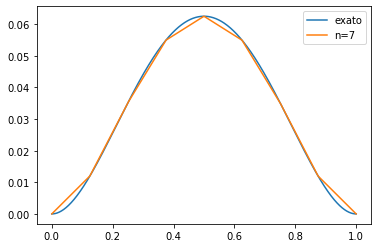

In [15]:
n = 7
plot_basic(u_exact, f, n)

##### **4.1.2. Teste 2**



Intervalo $[0,1]$, para $k(x)=1$, $q(x)=0$, $f(x)=\pi^2 sin(\pi x)$, com condições de contorno homogêneas. Neste caso, a solução deve ser exata: $u(x)=sin(\pi x)$.

In [16]:
# Define a função u exata 
u_exact = lambda x: np.sin(np.pi*x)

# Define a função f que será utilizada para aproximar a solução
f = lambda x : (np.pi)**2*np.sin(np.pi*x)

# Define as funções k e q
k = lambda x : 1
q = lambda x : 0

# Define o comprimento L do intervalo
L = 1

# Valores de n para serem testados
n = [7,15,31,63]

for i in n:
  sample = pontos_L(L, i) # Define os nós para cada n e L constante
  error = []
  max = 0
  for j in sample:
    if (abs(u_exact(j)-u_L(f,k, q, L, j, i)) > max):
      max = abs(u_exact(j)-u_L(f,k, q, L, j, i))

  # Imprime o maior erro encontrado entre o valor real e aproximado 
  # NOS NÓS, para cada n
  print(f"Erro máximo para n = {i} (h = {L/(i+1)}): {max}")

Erro máximo para n = 7 (h = 0.125): 2.220446049250313e-16
Erro máximo para n = 15 (h = 0.0625): 7.771561172376096e-16
Erro máximo para n = 31 (h = 0.03125): 4.884981308350689e-15
Erro máximo para n = 63 (h = 0.015625): 6.8833827526759706e-15


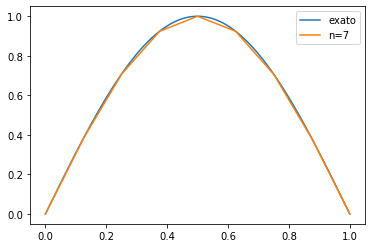

In [17]:
n = 7
plot_L(u_exact, f, k, q, L, n)

##### **4.1.3. Teste 3**



Intervalo $[0,1]$, para $k(x)=1$, $q(x)=0$, $f(x)=-(4x(1 - 3x + 2x^2)cos(x) + (2 - 12x + 11x^2 + 2x^3 - x^4)sin(x))$, com condições de contorno homogêneas. Neste caso, a solução deve ser exata: $u(x)=x^2(1-x)^2sin(x)$.

In [18]:
# Define a função u exata 
u_exact = lambda x : x**2*(1-x)**2*np.sin(x)

# Define a função f que será utilizada para aproximar a solução
f = lambda x : -(4*x*(1 - 3*x + 2*x**2)*np.cos(x) + 
                 (2 - 12*x + 11*x**2 + 2*x**3 - x**4)*np.sin(x))

# Define as funções k, k_prime e q
k = lambda x : 1
k_prime = lambda x : 0
q = lambda x : 0

# Define as condições não-homogêneas e o intervalo [0,L]
a = 0
b = 0
L = 1

# Valores de n para serem testados
n = [7,15,31,63]

for i in n:
  sample = pontos_L(L, i) # Define os nós para cada n e L constante
  error = []
  max = 0
  for j in sample:
    if (abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i)) > max):
      max = abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i))

  # Imprime o maior erro encontrado entre o valor real e aproximado 
  # NOS NÓS, para cada n
  print(f"Erro máximo para n = {i} (h = {L/(i+1)}): {max}")

Erro máximo para n = 7 (h = 0.125): 6.938893903907228e-18
Erro máximo para n = 15 (h = 0.0625): 3.122502256758253e-17
Erro máximo para n = 31 (h = 0.03125): 1.6653345369377348e-16
Erro máximo para n = 63 (h = 0.015625): 1.3877787807814457e-16


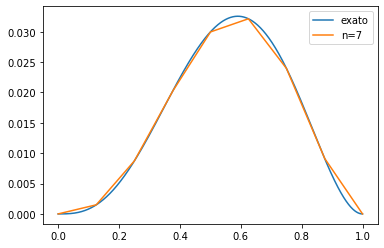

In [19]:
n = 7
plot_full(u_exact, f, k, k_prime, q, a, b, L, n)

##### **4.1.4. Teste 4**

Agora, mais um teste será realizado: vamos utilizar a rotina geral `u_full` para aproximar a função $f(x) = -e^x$, ainda com $k(x) = 1$ e $q(x) = 0$. Neste caso, a solução exata será $u(x) = e^x$.


In [20]:
# Define a função u exata 
u_exact = lambda x : np.exp(x)

# Define a função f que será utilizada para aproximar a solução
f = lambda x : -np.exp(x)

# Define as funções k, k_prime e q
k = lambda x : 1
k_prime = lambda x : 0
q = lambda x : 0

# Define as condições não-homogêneas e o intervalo [0,L]
a = 1
b = np.exp(2)
L = 2

# Valores de n para serem testados
n = [7,15,31,63]

for i in n:
  sample = pontos_L(L, i) # Define os nós para cada n e L constante
  error = []
  max = 0
  for j in sample:
    if (abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i)) > max):
      max = abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i))

  # Imprime o maior erro encontrado entre o valor real e aproximado 
  # NOS NÓS, para cada n
  print(f"Erro máximo para n = {i} (h = {L/(i+1)}): {max}")

Erro máximo para n = 7 (h = 0.25): 8.881784197001252e-16
Erro máximo para n = 15 (h = 0.125): 1.3322676295501878e-15
Erro máximo para n = 31 (h = 0.0625): 7.105427357601002e-15
Erro máximo para n = 63 (h = 0.03125): 1.0658141036401503e-14


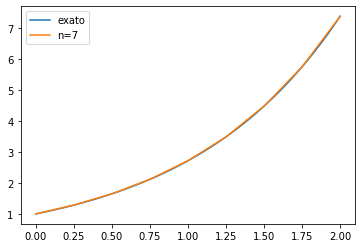

In [21]:
n = 7
plot_full(u_exact, f, k, k_prime, q, a, b, L, n)

Em todos os casos até aqui (com $k(x)=1$), percebe-se empiricamente (é possível provar matemáticamente) que a aproximação passa exatamente pelos nós uniformemente espaçados definidos por $x_i = ih$. Com isso, a aproximação é exatamente um spline linear definido por esses pontos, ou seja, o erro para o restante dos pontos é dado pelo erro de splines:

$$|E(x)| = |u(x) - \overline{u}_n(x)| \leq \max_{\overline{x}\in[0,1]}\frac{|u''(\overline{x})|}{2}\frac{h^2}{4}$$

Ou seja, se $u$ for duas vezes diferenciável, então o erro tem complexidade $\mathcal{O}(h^2)$, o que garante a convergência do método nesses casos.



#### **4.1.5. Teste Adicional para Validação do Código**

Foi sugerido pelo enunciado uma verificação adicional para o código, por meio de um exemplo que contradiz essa verificação para $k(x) = 1$.

No intervalo $[0,1]$, considerar $k(x)=e^x$, $q(x)=0$, $f(x)=e^x+1$, com condições de contorno homogêneas. A solução encontrada deve ser exata: $u(x)=(x-1)(e^{-x}-1)$. Verificar que a convergência do método é de segunda ordem calculando as aproximações com $n=7,15,31$ e $63$, avaliando $||\bar{u}_n-u||=max_{i=1,...,n}|\bar{u}_n(x_i)-u(x_i)|$.

In [22]:
u_exact = lambda x : (x-1)*(np.exp(-x)-1)
f = lambda x : np.exp(x)+1

k = lambda x : np.exp(x)
k_prime = lambda x : np.exp(x)
q = lambda x : 0
a = 0
b = 0
L = 1

n = [7,15,31,63]

salva_erro = []
for i in n:
  sample = pontos_L(L, i)
  error = []
  max = 0
  for j in sample:
    if (abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i)) > max):
      max = abs(u_exact(j)-u_full(f, k, k_prime, q, a, b, L, j, i))
  salva_erro.append(max)

  print(f"Erro máximo para n = {i} (h = {L/(i+1)}): {max}")

Erro máximo para n = 7 (h = 0.125): 9.854685699156596e-05
Erro máximo para n = 15 (h = 0.0625): 2.481511620394672e-05
Erro máximo para n = 31 (h = 0.03125): 6.210976009918268e-06
Erro máximo para n = 63 (h = 0.015625): 1.5536373545455007e-06


Podemos verificar com boa aproximação que a convergência do método é de segunda ordem. Ao diminuir o "intervalo de partição" $h$ pela **metade** $\left ( h_{k+1} = \dfrac{h_{k}}{2} \right )$, o erro cai proporcionalmente a $h^2$, diminuindo **$4$ vezes** entre as iterações:

In [23]:
print("Erros encontrados:", salva_erro)
erro_esperado = []
erro_esperado.append(salva_erro[0])
h = []

for i in range(3):
  prox_erro = erro_esperado[i]/4
  erro_esperado.append(prox_erro)

for i in range(1, 4):
  h.append(salva_erro[i]/salva_erro[i-1])

print("Razão Erro[i+1]/Erro[i]: ", h)
print("Erros esperados: ", erro_esperado)


Erros encontrados: [9.854685699156596e-05, 2.481511620394672e-05, 6.210976009918268e-06, 1.5536373545455007e-06]
Razão Erro[i+1]/Erro[i]:  [0.25181032618899757, 0.25029002318072735, 0.25014383440935967]
Erros esperados:  [9.854685699156596e-05, 2.463671424789149e-05, 6.159178561972872e-06, 1.539794640493218e-06]


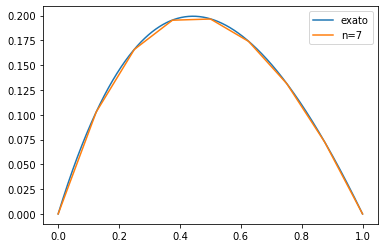

In [24]:
n = 7
plot_full(u_exact, f, k, k_prime, q, a, b, L, n)

Sendo assim, fica demonstrado que o método realmente apresenta convergência na ordem de $\mathcal{O}(h^2)$, mesmo fora do caso particular dos splines lineares exatos.

### **4.2. Equilíbrio com Forçantes de Calor**

Vamos considerar que o chip seja formado apenas de silício ($k(x)=k=148 \, W/(mK))$, que haja produção de calor pelo chip e que exista resfriamento. Ao assumir que o chip esquenta mais em sua porção central do que nas bordas, podemos modelar o calor gerado pelo chip por uma gaussiana:
$$Q_+(x) = {Q^0}_+ e^{-(x-L/2)^2 / \sigma^2}$$ 
Com ${Q^0}_+$ sendo uma constante que indica o máximo de calor gerado dentro do chip e $\sigma$ é uma constante que controla a variação de geração de calor em torno do ponto central do chip (quanto menor o valor de $\sigma$, mais concentrada é a geração de calor no centro).

Quanto ao calor retirado do sistema pelo resfriador, podemos assumir inicialmente que o resfriamento se dá de maneira uniforme: $Q_-(x) = {Q^0}_-$(constante). Posteriormente, é válido adotar um modelo mais próximo da realidade, assumindo que o resfriamento é mais intenso próximo aos extremos, usando
$$Q_-(x) = {Q^0}_- (e^{-(x)^2/\theta^2}+e^{-(x-L)^2/\theta^2})$$

Aqui, vamos assumir os valores reais de condutividade térmica de alguns metais, encontrados nos *links* relatados nas referências. Escolhemos valores diferentes dos fornecidos pelo enunciado da tarefa, porque há uma divergência considerável em relação à literatura.

Como apenas condições homogêneas serão consideradas nas seguintes análises, vamos utilizar a função `u_L`.

#### **4.2.1. Caso 1: Calor Gerado e Retirado Constantes**

Para começar a validação, vamos utilizar valores de calor gerado e retirado constantes calculados a partir da potência e do volume do processador como sugere o enunciado da tarefa. 

Para um chip com potência $P=30W$ e dimensões $L = 20mm$ e $h = 2mm$, podemos calcular o calor gerado como $$Q_+(x)=\dfrac{P}{V} = \dfrac{P}{L^2h}= \frac{30}{(20\cdot 10^{-3})^2 \cdot 2\cdot 10^{-3}} \Rightarrow Q_+(x) = 37,5 \cdot 10^6 J$$

Para o calor retirado, vamos arbitrar um valor que seja coerente com o calor gerado, isto é, que não permita que o processador esquente muito: $Q_-(x)=25 \cdot 10^6 J$. Adotaremos como modelo simplificado que a temperatura nos extremos será exatamente a temperatura do ambiente externo
(em torno de $20°C$).

Note que essa modelagem com calores constantes ainda é bem distante do fenômeno real.

In [25]:
L = 0.02 # (20mm) 
Q0_mais = 37500000 
Q_mais = lambda x: Q0_mais # calor gerado

Q0_menos = 25000000
Q_menos = lambda x: Q0_menos # calor retirado

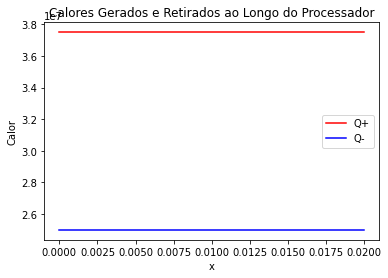

In [26]:
x = np.linspace(0, L, 1000)
y1 = [Q_mais(i) for i in x]
y2 = [Q_menos(i) for i in x]
plt.plot(x, y1, color='r', label='Q+') 
plt.plot(x, y2, color='b', label='Q-') 
plt.xlabel("x") 
plt.ylabel("Calor") 
plt.title("Calores Gerados e Retirados ao Longo do Processador") 
plt.legend() 
plt.show() 

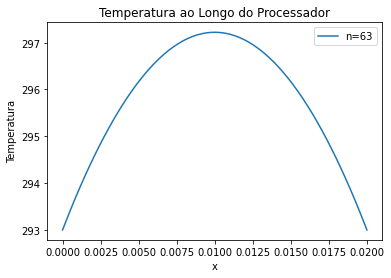

In [27]:
f = lambda x: Q_mais(x) - Q_menos(x)
k = lambda x: 148 # W/mK
k_prime = lambda x: 0
q = lambda x: 0
a = 293 # em Kelvin
b = 293 # em Kelvin

n = 63
x = np.linspace(0, L, 1000)
y = [u_full(f, k, k_prime, q, a, b, L, i, n) for i in x]
plt.plot(x,y,label=f'n={n}')
plt.xlabel("x") 
plt.ylabel("Temperatura") 
plt.title("Temperatura ao Longo do Processador")
plt.legend()
plt.show()

#### **4.2.2. Caso 2: Calor Gerado Modelado pela Gaussiana e Calor Retirado Constante**

No caso a seguir, vamos continuar utilizando os valores constantes adotados acima para calores gerados e retirados em ${Q^0}_+$ e ${Q^0}_-$. Seriam valores de referência, em torno dos quais o calor varia ao longo do comprimento do chip.

Quanto à constante $\sigma$ que determina a concentração de calor no processador, consideramos coerente adotar um valor de $\sigma=0,003$ para a modelagem.

In [28]:
L = 0.02 # (20mm)
# sigma = sg 
sg = 0.003
Q0_mais = 37500000 
# calor gerado = Q_mais
Q_mais = lambda x: Q0_mais*np.exp(-((x-L/2)**2)/(sg**2)) 

Q0_menos = 25000000 
Q_menos = lambda x: Q0_menos

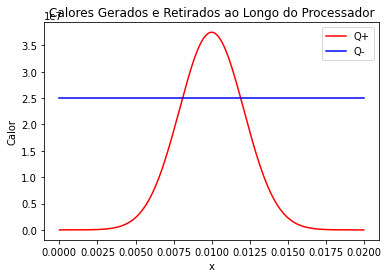

In [29]:
x = np.linspace(0, L, 1000)
y1 = [Q_mais(i) for i in x]
y2 = [Q_menos(i) for i in x]
plt.plot(x, y1, color='r', label='Q+') 
plt.plot(x, y2, color='b', label='Q-') 
plt.xlabel("x") 
plt.ylabel("Calor") 
plt.title("Calores Gerados e Retirados ao Longo do Processador") 
plt.legend() 
plt.show() 

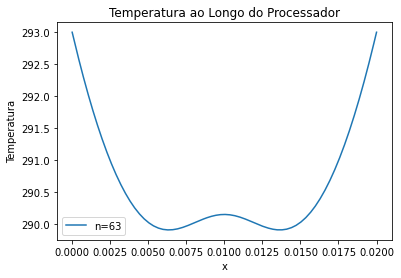

In [30]:
f = lambda x: Q_mais(x) - Q_menos(x)
k = lambda x: 148 # W/mK
k_prime = lambda x: 0
q = lambda x: 0
a = 293 # em Kelvin
b = 293 # em Kelvin

n = 63
x = np.linspace(0, L, 1000)
y = [u_full(f, k, k_prime, q, a, b, L, i, n) for i in x]
plt.plot(x,y,label=f'n={n}')
plt.xlabel("x") 
plt.ylabel("Temperatura") 
plt.title("Temperatura ao Longo do Processador")
plt.legend()
plt.show()

#### **4.2.3. Caso 3: Calor Gerado e Retirado Modelado por Gaussianas**

Neste caso de análise, vamos reutilizar os valores adotados para ${Q^0}_+$, ${Q^0}_-$ e $\sigma$, adicionando o complicador $\theta$.


A constante $\theta$ é a resistência térmica do *cooler*, sendo que esse valor diminui conforme o *cooler* aumenta de tamanho.
Assumiremos que esse valor está próximo de $0,005$ ($\theta = 0,005$).

In [31]:
L = 0.02 # (20mm)
# sigma = sg 
sg = 0.003
Q0_mais = 37500000 
# calor gerado = Q_mais
Q_mais = lambda x: Q0_mais*np.exp(-((x-L/2)**2)/(sg**2)) 

# theta = th
th = 0.005
Q0_menos = 10000000 
Q_menos = lambda x: Q0_menos*(np.exp(-(x**2)/(th**2)) + np.exp(-((x-L)**2)/(th**2)))

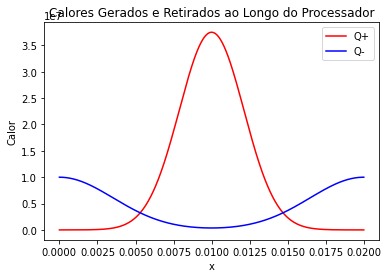

In [32]:
x = np.linspace(0, L, 1000)
y1 = [Q_mais(i) for i in x]
y2 = [Q_menos(i) for i in x]
plt.plot(x, y1, color='r', label='Q+') 
plt.plot(x, y2, color='b', label='Q-') 
plt.xlabel("x") 
plt.ylabel("Calor") 
plt.title("Calores Gerados e Retirados ao Longo do Processador") 
plt.legend() 
plt.show() 

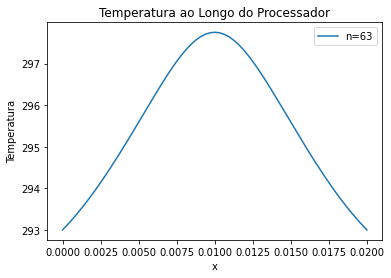

In [33]:
f = lambda x: Q_mais(x) - Q_menos(x)
k = lambda x: 148 # W/mK
k_prime = lambda x: 0
q = lambda x: 0
a = 293 # em Kelvin
b = 293 # em Kelvin

n = 63
x = np.linspace(0, L, 1000)
y = [u_full(f, k, k_prime, q, a, b, L, i, n) for i in x]
plt.plot(x,y,label=f'n={n}')
plt.xlabel("x") 
plt.ylabel("Temperatura") 
plt.title("Temperatura ao Longo do Processador")
plt.legend()
plt.show()

### **4.3. Equilíbrio com variação de material**

Agora, vamos supor que no bloco do processador tenhamos o chip, formado de silício, envolto por outro material. Isso faz com que $k$ dependa de $x$, por exemplo como

$$k(x) =\begin{cases}
k_s, \, \textrm{se $x \in (L/2-d, L/2+d)$} \\
k_a,\,  \textrm{caso contrário} \\
\end{cases}$$

Sendo $k_s$ a condutividade térmica do silício e $k_a$ a do material que envolve o chip e forma o bloco do processador.

#### **4.3.1. Chip de Silício Envolto por Bloco de Alumínio**


Nesse caso, temos

$$k(x) =\begin{cases}
148\, W/mK, \, \textrm{se $x \in (L/2-d, L/2+d)$} \\
204 \, W/mK,\,  \textrm{caso contrário} \\
\end{cases}$$

Vamos definir um intervalo total de análise $[0,3]$, assumindo que o chip tem comprimento unitário e encontra-se centralizado no eixo $x$. Dessa forma, temos que, para $x \in [0,1[ \, \cup \, ]2,3]$, estamos sobre o bloco do processador e, para $x \in [1,2]$, estamos sobre o chip.

In [34]:
L = 3
ks = 148 # condutividade térmica do silício [W/mK]
ka = 204 # condutividade térmica do alumínio [W/mK]
def k(x):
  if x >=L/3 and x <= 2*L/3: # região sobre o chip
    k = ks
  else:
    k = ka
  return k

Para a aplicação do método considerando a **variação de material**, vamos utilizar os mesmos calores definidos na seção **4.2.3. Caso 3: Calor Gerado e Retirado Modelado por Gaussianas**. 

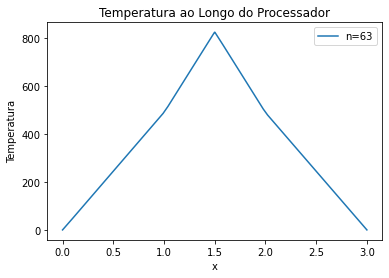

In [35]:
f = lambda x: Q_mais(x) - Q_menos(x)
#k = lambda x: k(x) # W/mK
q = lambda x: 0

n = 63

x = np.linspace(0, L, 1000)
y = [u_L(f, k, q, L, i, n) for i in x]
plt.plot(x,y,label=f'n={n}')
plt.xlabel("x") 
plt.ylabel("Temperatura") 
plt.title("Temperatura ao Longo do Processador")
plt.legend()
plt.show()

#### **4.3.2. Chip de Silício Envolto por Bloco de Cobre**


Nesse caso, temos

$$k(x) =\begin{cases}
148 \, W/mK, \, \textrm{se $x \in (L/2-d, L/2+d)$} \\
372 \, W/mK,\,  \textrm{caso contrário} \\
\end{cases}$$

In [36]:
L=3
ks = 148 # condutividade térmica do silício [W/mK]
kc = 372 # condutividade térmica do cobre [W/mK]
def k(x):
  if x >=L/3 and x <= 2*L/3: # região sobre o chip
    k = ks
  else:
    k = kc
  return k

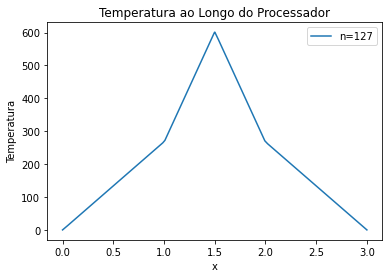

In [37]:
f = lambda x: Q_mais(x) - Q_menos(x)
#k = lambda x: k(x) # W/mK
q = lambda x: 0

n = 127

x = np.linspace(0, L, 1000)
y = [u_L(f, k, q, L, i, n) for i in x]
plt.plot(x,y,label=f'n={n}')
plt.xlabel("x") 
plt.ylabel("Temperatura") 
plt.title("Temperatura ao Longo do Processador")
plt.legend()
plt.show()

## **Referências**

- Equipe de MAP3121. Modelagem de um Sistema de Resfriamento de Chips.

- Peixoto, Pedro Silva. Anotações de aula de MAP3121.

- Narcowich October, F. J. (n.d.). <i>Splines and Finite Element Spaces</i>. https://www.math.tamu.edu/~fnarc/m641/m641_notes/splines2014.pdf

- Antonio Pereira da Silva, C. (2011). <i>O Problema de Sturm-Liouville e Aplicações</i>. http://dspace.bc.uepb.edu.br/jspui/bitstream/123456789/716/1/PDF%20-%20Carlos%20Antonio%20Pereira%20da%20Silva.pdf

- Ávila Silva, F. (n.d.). <i>Teoria de Sturm-Liouville e Problemas de Valores de Contorno</i>. Retrieved July 8, 2022, from https://acervodigital.ufpr.br/bitstream/handle/1884/54775/LUBANCO-ARTIGO.pdf?sequence=1&#38;isAllowed=y

- Protolab - Tabela de Codutividade Térmica de Materiais de Construção</i>. (n.d.). Retrieved July 8, 2022, from http://www.protolab.com.br/Tabela-Condutividade-Material-Construcao.htm

- Vilcent, W. (2021). <i>CÁLCULO DA CONDUTIVIDADE TÉRMICA EM UM PROBLEMA DE CONDUÇÃO DO CALOR</i>. https://rd.uffs.edu.br/bitstream/prefix/4704/1/VILCENT.pdf